In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [4]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
print('Librairies imported')

Importing librairies...
Librairies imported


In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
start = '2014-01-28'
end = '2019-05-26'

In [20]:
vix = web.DataReader('^VIX','yahoo',start,end)
spy = web.DataReader('SPY','yahoo',start,end)

In [29]:
df = spy.copy()
df['Date'] = df.index
df = df.drop('Volume',axis=1)
df['Vix'] = vix['Adj Close']
df.reset_index(inplace=True,drop=True)

In [30]:
df.head()

,High,Low,Open,Close,Adj Close,Date,Vix
0,179.300003,178.119995,178.139999,179.070007,161.464844,2014-01-28,15.800000
1,178.550003,176.880005,177.580002,177.350006,159.913971,2014-01-29,17.350000
2,179.809998,178.259995,178.830002,179.229996,161.609161,2014-01-30,17.290001
3,179.289993,176.919998,177.009995,178.179993,160.662384,2014-01-31,18.410000
4,178.369995,173.830002,177.970001,174.169998,157.046600,2014-02-03,21.440001


In [31]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1341
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1073  jours 
Bloc 2 : 268  jours


In [34]:
date = df['Date']

In [60]:
dataset = pd.DataFrame()
dataset['Date'] = df['Date']
dataset['Open'] = df['Open']
dataset['Vix'] = df['Vix'].shift(1)
dataset['Close'] = df['Adj Close']
dataset = dataset.dropna()
dataset.reset_index(inplace=True,drop=True)
dataset.head()

,Date,Open,Vix,Close
0,2014-01-29,177.580002,15.800000,159.913971
1,2014-01-30,178.830002,17.350000,161.609161
2,2014-01-31,177.009995,17.290001,160.662384
3,2014-02-03,177.970001,18.410000,157.046600
4,2014-02-04,174.949997,21.440001,158.146698


In [61]:
dataset.tail()

,Date,Open,Vix,Close
1335,2019-05-20,284.059998,15.960000,283.950012
1336,2019-05-21,285.829987,16.309999,286.510010
1337,2019-05-22,285.450012,14.950000,285.630005
1338,2019-05-23,283.160004,14.750000,282.140015
1339,2019-05-24,283.739990,16.920000,282.779999


In [68]:
# convert into input/output
X1 = dataset['Open'].values.reshape(len(dataset),1)
X2 = dataset['Vix'].values.reshape(len(dataset),1)
y = dataset['Close'].values.reshape(len(dataset),1)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

X1_train = X1[:bloc1]
X1_test = X1[bloc1:]

X2_train = X2[:bloc1]
X2_test = X2[bloc1:]

y_train = y[:bloc1]
y_test = y[bloc1:]


In [69]:
X_train = np.concatenate((X1_train,X2_train),axis=1)
X_test = np.concatenate((X1_test,X2_test),axis=1)

In [88]:
# first input model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [89]:
# fit model
model.fit(x=X_train, y=y_train, batch_size=1, epochs=10, verbose=1,shuffle=True,validation_split=.2)

Train on 858 samples, validate on 215 samples
Epoch 1/10
858/858 [==============================] - 3s 3ms/step - loss: 1868.6653 - val_loss: 21.3580
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 16.3640 - val_loss: 169.0951
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 20.0804 - val_loss: 27.8292
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 17.7253 - val_loss: 21.3701
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 18.1234 - val_loss: 197.3781
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 22.1588 - val_loss: 29.3490
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 15.6116 - val_loss: 27.7453
Epoch 8/10
858/858 [==============================] - 2s 2ms/step - loss: 19.6358 - val_loss: 117.7331
Epoch 9/10
858/858 [==============================] - 2s 2ms/step - loss: 18.4710 - val_loss: 117.8263
Epoch 10/10
858/858 [=========

In [23]:
model.save('GBPUSD.h5')

In [24]:
# demonstrate prediction
x_input = np.array([[df.iloc[-1,5],vix.iloc[-2,5]]])
yhat = model.predict(x_input, verbose=1)
print(yhat,'versus', df.iloc[-1,-1])

1/1 [==============================] - 0s 20ms/step
[[1.2669896]] versus 1.2664639949798584


In [25]:
print('Initializing \b Processing')
yhat = model.predict(X_test, verbose=1)
print('All processed')

Initializing Processing
228/228 [==============================] - 0s 21us/step
All processed


In [26]:
date.reset_index(inplace=True,drop=True)
resultats = date
resultats = resultats.iloc[-228:]
resultats.reset_index(inplace=True,drop=True)

In [27]:
pred = pd.DataFrame()
pred['Open'] = dataset.iloc[1111:,1]
pred['Vix'] = dataset.iloc[1111:,2]
pred['Close'] = dataset.iloc[1111:,3]
pred['Predictions'] = yhat.reshape(228,)
pred.reset_index(inplace=True,drop=True)
resultats = pd.concat((date,pred),axis=1)
resultats = resultats.iloc[:228,:]
resultats['% Error'] = ((resultats.iloc[:,3].values-resultats.iloc[:,4])/resultats.iloc[:,4])*100

In [28]:
resultats.tail()

,Date,Open,Vix,Close,Predictions,% Error
223,2015-02-13,1.273026,15.290000,1.273156,1.273547,-0.030721
224,2015-02-16,1.272783,15.960000,1.272912,1.273309,-0.031185
225,2015-02-17,1.410239,16.309999,1.410265,1.410582,-0.022486
226,2015-02-18,1.266336,14.950000,1.266416,1.266863,-0.035315
227,2015-02-19,1.266464,14.750000,1.266464,1.266990,-0.041512


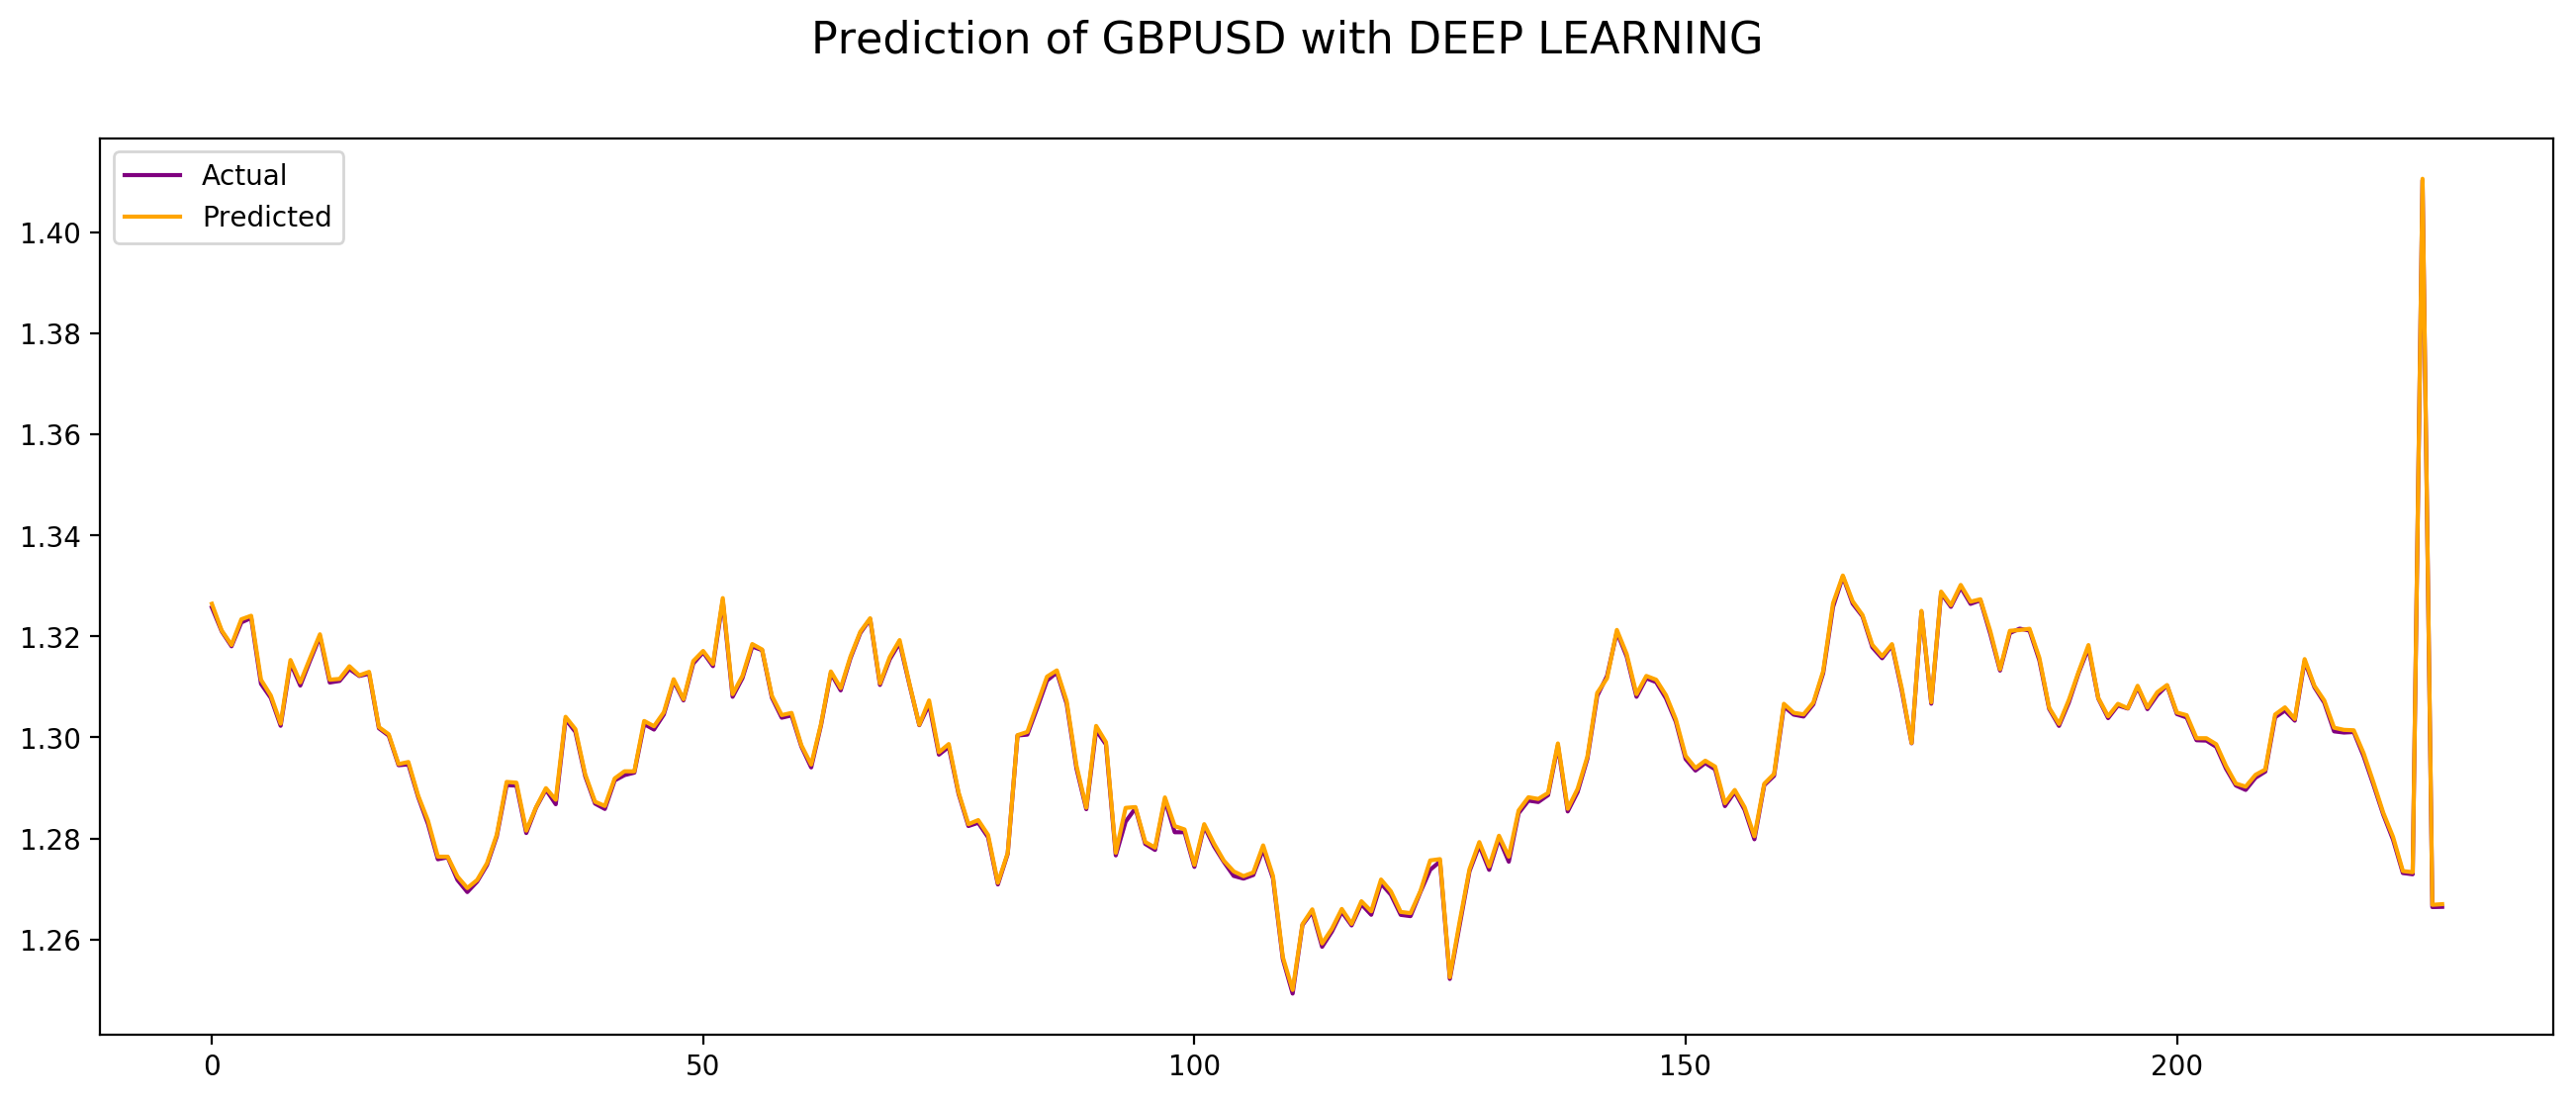

In [29]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['Close'],color='purple',label='Actual')
plt.plot(resultats['Predictions'],color='orange',label='Predicted')
plt.legend()
plt.show()

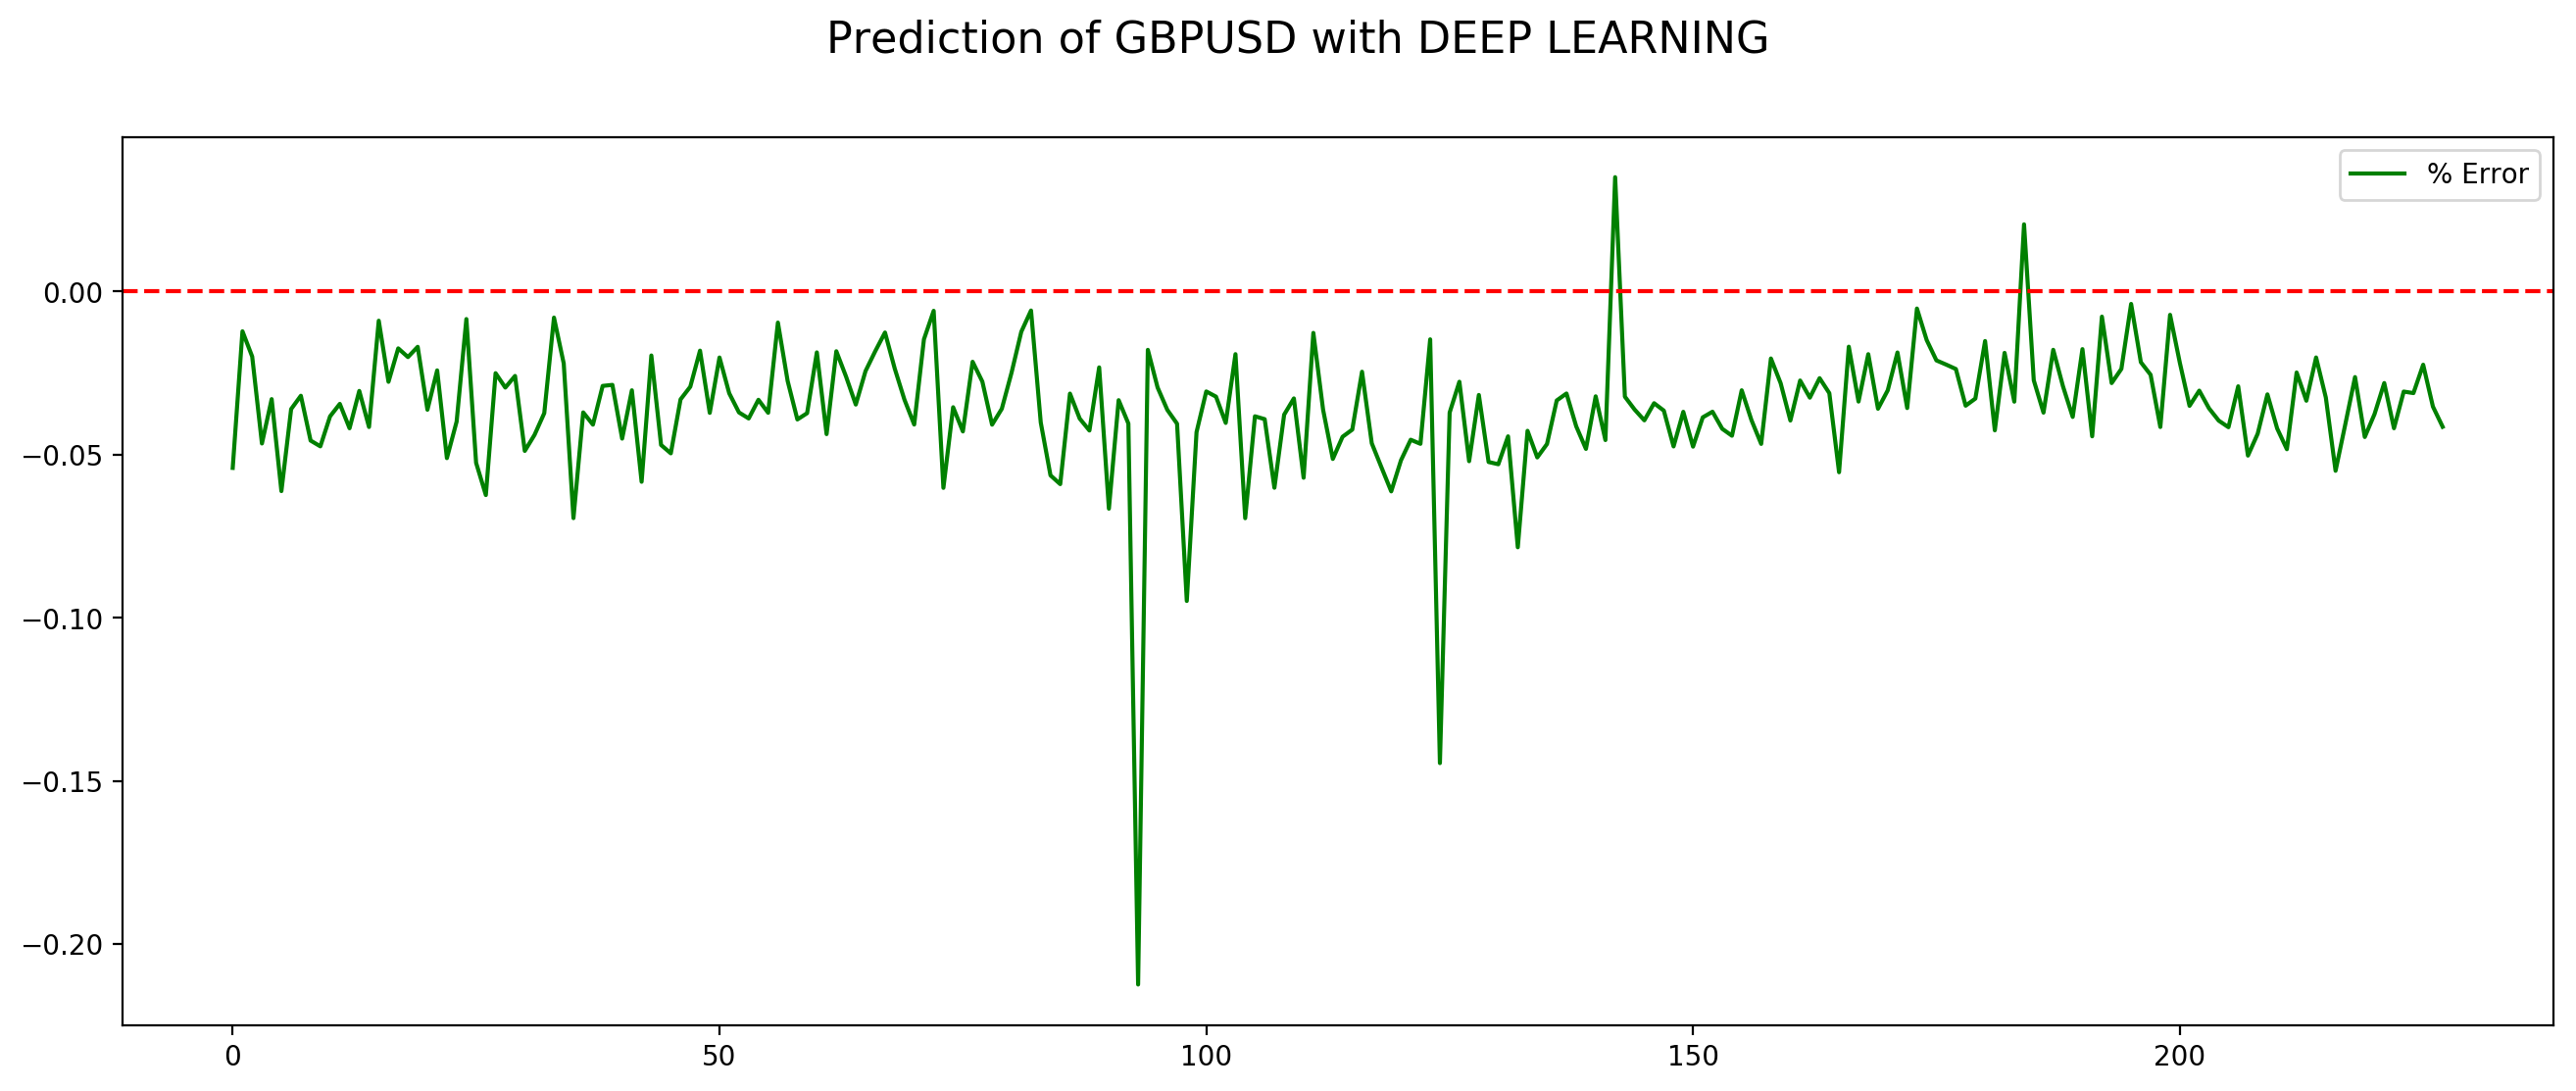

In [30]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['% Error'],color='g',label='% Error')
plt.axhline(y=0,linestyle='--',color='r')
plt.legend()
plt.show()